In [5]:
from utils import *
import librosa
import os
from sklearn.model_selection import train_test_split

In [6]:
# open csv
data = pd.read_csv('/home/haghob/projects_M2/ml_&_dl/ML_mars/package_entrainement/fichiers triés/911_metadata.csv')
data.head(3)

,id,event_id,link,title,date,state,deaths,potential_death,false_alarm,description,deaths_binary,break,filename
0,0,2,https://web.archive.org/web/20150417085342/htt...,Detroit Child’s 911 Call – audio,2/06,Michigan,1.0,1.0,0.0,– In Feb. 2006 5 year-old Robert Turner called...,1,13.0,911_first6sec/call_2_0.wav
1,1,8,https://web.archive.org/web/20150417085342/htt...,Girl’s Murder 911 Call,3/05,Florida,2.0,1.0,0.0,– the 911 call of a lifetime. Volusia County (...,1,3.0,911_first6sec/call_8_0.wav
2,2,9,https://web.archive.org/web/20150417085342/htt...,‘Shoot Her?’ 911 call,4/05,Texas,0.0,0.0,1.0,– caller reports her daughter is creating a di...,0,2.0,911_first6sec/call_9_0.wav


In [7]:
# on garde que les colonnes potential_death et filename
data = data[['filename', 'potential_death']]
data.head(3)

,filename,potential_death
0,911_first6sec/call_2_0.wav,1.0
1,911_first6sec/call_8_0.wav,1.0
2,911_first6sec/call_9_0.wav,0.0


In [8]:
data.shape

(710, 2)

In [9]:
# nombre de lignes avec des valeurs manquantes
data.isna().sum()

filename           0
potential_death    1
dtype: int64

In [10]:
# Quels fichiers audio ont des valeurs manquantes
data[data['potential_death'].isna()]['filename']

39    911_first6sec/call_54_0.wav
Name: filename, dtype: object

In [11]:
# on supprime les lignes avec des valeurs manquantes
data = data.dropna()
data.shape

(709, 2)

In [12]:
# Enlever "911_first6sec/" au début de chaque filename
data['filename'] = data['filename'].apply(lambda x: x[14:])
data.head(3)

,filename,potential_death
0,call_2_0.wav,1.0
1,call_8_0.wav,1.0
2,call_9_0.wav,0.0


In [13]:
# séparation des données en train et test
train, test = train_test_split(data, test_size=0.1, random_state=42, stratify=data['potential_death'])

In [14]:
train.shape

(638, 2)

In [15]:
# afficher les ligne de test avec potential_death = 0
test[test['potential_death'] == 0]

,filename,potential_death
105,call_123_0.wav,0.0
550,call_580_0.wav,0.0
610,call_638_0.wav,0.0
527,call_560_2.wav,0.0
567,call_595_0.wav,0.0
630,call_657_0.wav,0.0
506,call_548_0.wav,0.0
429,call_458_0.wav,0.0
57,call_73_0.wav,0.0
373,call_397_0.wav,0.0


In [16]:
# liste des fichiers dans test
test_files = test['filename'].values
# affichage dans l'ordre alphabétique
test_files.sort()
test_files

array(['call_123_0.wav', 'call_125_0.wav', 'call_134_0.wav',
       'call_139_0.wav', 'call_13_0.wav', 'call_185_0.wav',
       'call_218_0.wav', 'call_228_0.wav', 'call_249_0.wav',
       'call_265_0.wav', 'call_274_0.wav', 'call_286_3.wav',
       'call_292_0.wav', 'call_295_0.wav', 'call_305_0.wav',
       'call_308_0.wav', 'call_328_0.wav', 'call_33_0.wav',
       'call_352_0.wav', 'call_358_0.wav', 'call_397_0.wav',
       'call_409_0.wav', 'call_425_0.wav', 'call_434_0.wav',
       'call_445_0.wav', 'call_458_0.wav', 'call_470_0.wav',
       'call_472_0.wav', 'call_481_0.wav', 'call_488_0.wav',
       'call_489_0.wav', 'call_494_0.wav', 'call_513_0.wav',
       'call_517_0.wav', 'call_527_0.wav', 'call_548_0.wav',
       'call_560_2.wav', 'call_565_0.wav', 'call_56_0.wav',
       'call_572_0.wav', 'call_573_0.wav', 'call_580_0.wav',
       'call_585_0.wav', 'call_595_0.wav', 'call_600_0.wav',
       'call_604_1.wav', 'call_614_0.wav', 'call_618_0.wav',
       'call_61_0.wav', 'ca

In [18]:
# Répertoire contenant les fichiers audio
train_directory = "/home/haghob/projects_M2/ml_&_dl/ML_mars/package_entrainement/fichiers triés/ref_data"
taux_echantillonage = 50

# Liste pour stocker les noms de fichiers et les vecteurs de données
file_names = []
data_list = []

# Parcourir tous les fichiers dans le répertoire
for filename in os.listdir(train_directory):
    if filename.endswith(".wav"):
        # Chemin complet du fichier
        file_path = os.path.join(train_directory, filename)
        
        # Charger le fichier audio avec Librosa
        data, _ = librosa.load(file_path, sr=taux_echantillonage)
        
        # Stocker le nom du fichier et le vecteur de données dans les listes
        file_names.append(filename)
        data_list.append(data)

# Créer un DataFrame avec les noms de fichiers
audiodata = pd.DataFrame({'filename': file_names})

# Ajouter une colonne pour chaque valeur du vecteur de données
audiodata = pd.concat([audiodata, pd.DataFrame(data_list, columns=[f'val_{i+1}' for i in range(len(data_list[0]))])], axis=1)

# Afficher le DataFrame
audiodata.head()

,filename,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,...,val_291,val_292,val_293,val_294,val_295,val_296,val_297,val_298,val_299,val_300
0,call_341_1.wav,5.878629e-04,0.003193,0.006048,-2.710887e-03,0.000320,-0.000976,-0.001637,0.001965,-0.000021,...,-1.156875e-04,0.000535,-8.009170e-04,0.001720,2.929082e-03,-0.001979,0.001152,-0.000179,-0.000982,0.002157
1,call_570_0.wav,7.518906e-07,0.000002,0.000002,1.166818e-07,0.000002,0.000001,0.000002,0.000001,0.000002,...,5.553068e-07,0.000003,-6.282509e-07,0.000003,-9.233906e-07,0.000005,-0.000001,0.000002,-0.000002,0.000003
2,call_421_0.wav,-1.557965e-04,0.000431,0.000522,-1.984590e-04,-0.000383,0.000132,0.000497,-0.001465,-0.000245,...,-6.729824e-04,-0.001367,1.566205e-04,0.000169,2.052340e-04,-0.001295,-0.000005,-0.000394,0.000148,0.000704
3,call_731_0.wav,-8.592176e-04,-0.001942,-0.001723,-1.618285e-03,-0.001595,-0.001471,-0.001285,-0.001485,-0.001378,...,-1.536155e-03,-0.001591,-1.621122e-03,-0.001433,-1.475662e-03,-0.001224,-0.001528,-0.001666,-0.001604,-0.001947
4,call_221_1.wav,1.146886e-03,-0.000010,0.000043,-2.919064e-05,-0.000116,0.000079,-0.000102,0.000105,-0.000130,...,-2.224924e-05,0.000057,-8.202087e-05,-0.000463,-2.708550e-03,-0.001717,0.000086,-0.000080,-0.000007,-0.000033


In [19]:
# Mettre 0 pour les valeurs manquantes
audiodata.fillna(0, inplace=True)

In [20]:
# Fusionner les données audio avec les données de train
data_final = pd.merge(train, audiodata, on='filename', how='inner')
data_final.shape

(638, 302)

In [21]:
# potential_death en int
data_final['potential_death'] = data_final['potential_death'].astype(int)

In [22]:
data_final.head()

,filename,potential_death,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,...,val_291,val_292,val_293,val_294,val_295,val_296,val_297,val_298,val_299,val_300
0,call_28_0.wav,0,-0.000299,-0.000130,0.000051,-0.000055,-0.000085,-0.000053,-0.000103,-0.000156,...,0.000024,0.000189,-0.000061,0.001465,0.000319,-0.000189,0.000037,-0.000692,-0.000078,-0.000140
1,call_571_0.wav,1,0.000172,0.000013,-0.000170,-0.000057,-0.000162,0.000059,-0.000110,0.000130,...,-0.000086,0.000007,0.000054,0.000212,0.000055,0.000055,-0.000242,-0.000324,-0.000230,0.000032
2,call_552_6.wav,1,0.001367,-0.000249,-0.000033,0.000284,-0.000208,0.000222,-0.000181,0.000120,...,-0.000027,0.000024,-0.000024,0.000023,-0.000022,0.000020,-0.000019,0.000013,-0.000009,0.000011
3,call_331_0.wav,1,-0.000069,-0.000111,-0.000046,-0.000123,0.003076,0.001398,-0.000084,-0.000095,...,-0.001763,-0.000995,0.001340,-0.000166,-0.001208,0.000146,0.000097,0.000091,-0.000161,0.000288
4,call_196_0.wav,1,-0.008635,-0.007480,-0.002781,0.002499,-0.000169,0.001504,0.002012,-0.003619,...,0.000050,-0.002019,0.000975,0.000391,-0.001972,0.000629,0.001150,0.000440,0.000305,0.001096


In [23]:
# Enregistrer les données dans un fichier CSV
data_final.to_csv('refdata.csv', index=False)

# Entrainement du model

In [24]:
X = data_final.drop(['filename', 'potential_death'], axis=1)
Y = data_final['potential_death']

In [25]:
colonnes = X.columns
colonnes

Index(['val_1', 'val_2', 'val_3', 'val_4', 'val_5', 'val_6', 'val_7', 'val_8',
       'val_9', 'val_10',
       ...
       'val_291', 'val_292', 'val_293', 'val_294', 'val_295', 'val_296',
       'val_297', 'val_298', 'val_299', 'val_300'],
      dtype='object', length=300)

In [26]:
X = X.values
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [27]:
best_model, strategie=comparaison_classifieurs(X,Y,X_norm,clfs)

 50%|█████     | 1/2 [00:01<00:01,  1.47s/it]

balanced_accuracy Moyen for CART is: 0.510 +/- 0.072


100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


balanced_accuracy Moyen for ID3 is: 0.500 +/- 0.080


 50%|█████     | 1/2 [00:01<00:01,  1.46s/it]

balanced_accuracy Moyen for CART is: 0.508 +/- 0.073


100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

balanced_accuracy Moyen for ID3 is: 0.499 +/- 0.081


In [28]:
best_model

DecisionTreeClassifier(random_state=1)

In [29]:
# dump best model
pickle.dump(best_model, open('best_model.pkl', 'wb'))

Sélection des variables

Index(['val_169', 'val_296', 'val_267', 'val_80', 'val_60', 'val_33',
       'val_224', 'val_252', 'val_18', 'val_117',
       ...
       'val_208', 'val_55', 'val_160', 'val_164', 'val_226', 'val_86',
       'val_137', 'val_192', 'val_68', 'val_161'],
      dtype='object', length=300)


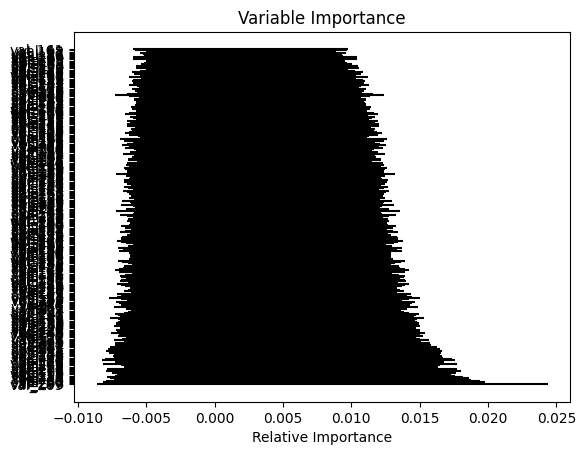

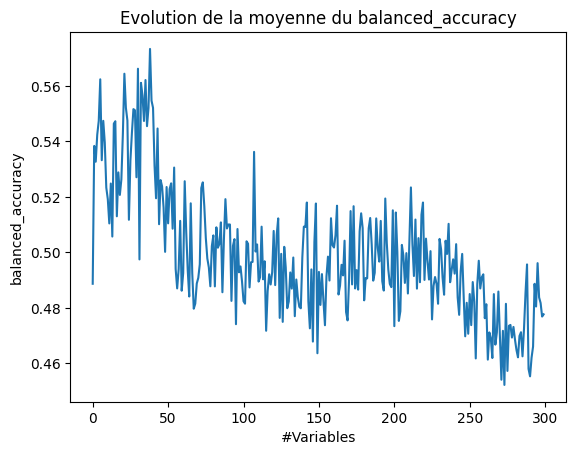

array([168, 295, 266,  79,  59,  32, 223, 251,  17, 116, 117,  52, 105,
        18, 172, 291,  11, 272,  94, 239, 188,  28,  12, 230,  98, 277,
       206, 125, 234,  71, 283,  92, 250,   1, 293,  80,  13, 278, 298])

In [30]:
selected_features=feature_selection(X,X_norm,Y,colonnes,best_model,strategie)
selected_features

In [31]:
classifieur=select_parameters(X,X_norm,Y,best_model,strategie,selected_features)
classifieur

0.5002693602693603


DecisionTreeClassifier(max_depth=4, random_state=1)

In [32]:
automatisation(X,X_norm,Y,strategie,classifieur,selected_features)

### Prédiction des nouvelles données

In [33]:
def prepa_audio(lien, taux):
    data, _ = librosa.load(lien, sr=taux)

    df = pd.DataFrame(data.reshape(1, -1))

    return df

In [34]:
pipeline = pickle.load(open('model_final_audio.pkl', 'rb'))
pipeline

Pipeline(steps=[('FS',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000,
                                                                  random_state=1),
                                 max_features=39)),
                ('classifieur',
                 DecisionTreeClassifier(max_depth=4, random_state=1))])

In [36]:
to_predict = prepa_audio('/home/haghob/projects_M2/ml_&_dl/ML_mars/package_entrainement/fichiers triés/data_test/call_56_0.wav', taux_echantillonage)
to_predict.values.tolist()[0]

[0.003958233632147312,
 0.0037329362239688635,
 -0.0005469014868140221,
 0.0017861297819763422,
 -0.0003631049767136574,
 0.0001570526510477066,
 -0.0002612136013340205,
 -3.087779623456299e-05,
 -0.0001400633918819949,
 -7.729128992650658e-05,
 -0.00022319034906104207,
 -0.00011120915587525815,
 0.0003298499796073884,
 0.00012740415695589036,
 -3.861673758365214e-05,
 -0.0006086959037929773,
 -0.000336157507263124,
 -0.0005567175103351474,
 -0.00015674180758651346,
 -0.0008945506997406483,
 0.0001186807276098989,
 0.0011485641589388251,
 -0.002831128193065524,
 0.0014590780483558774,
 -0.0034066808875650167,
 -0.004269088618457317,
 0.0013875094009563327,
 -0.00046019803266972303,
 0.0014129342744126916,
 0.0006343057611957192,
 0.001395874423906207,
 0.000840175780467689,
 0.0008997010299935937,
 0.00016734428936615586,
 -0.000491610961034894,
 -0.00027837586821988225,
 -0.0006948353257030249,
 0.00019153521861881018,
 -0.001142615918070078,
 -0.0005006255814805627,
 -0.0001746414782

In [37]:
# prédiction
prediction = pipeline.predict(to_predict)
prediction[0]

0

In [39]:
# pour chaque fichier du dossier data_test, faire la préparation et la prédiction
for filename in os.listdir('/home/haghob/projects_M2/ml_&_dl/ML_mars/package_entrainement/fichiers triés/ref_data'):
    
    if filename.endswith(".wav"):
        file_path = os.path.join('/home/haghob/projects_M2/ml_&_dl/ML_mars/package_entrainement/fichiers triés/ref_data', filename)
        to_predict = prepa_audio(file_path, taux_echantillonage)
        prediction = pipeline.predict(to_predict)
        print(filename, prediction)

call_341_1.wav [0]
call_570_0.wav [1]
call_421_0.wav [1]
call_731_0.wav [1]
call_221_1.wav [1]
call_734_0.wav [1]
call_499_0.wav [1]
call_68_0.wav [1]
call_437_0.wav [1]
call_705_0.wav [1]
call_389_0.wav [1]
call_19_0.wav [1]
call_659_0.wav [1]
call_669_0.wav [1]
call_505_0.wav [1]
call_364_0.wav [1]
call_195_0.wav [1]
call_393_0.wav [1]
call_583_0.wav [1]
call_507_0.wav [1]
call_168_0.wav [1]
call_212_0.wav [1]
call_169_0.wav [0]
call_30_0.wav [1]
call_643_1.wav [1]
call_290_0.wav [1]
call_329_0.wav [1]
call_381_0.wav [1]
call_371_0.wav [1]
call_65_0.wav [1]
call_216_0.wav [1]
call_152_0.wav [1]
call_671_0.wav [1]
call_331_0.wav [1]
call_557_0.wav [1]
call_188_0.wav [1]
call_411_0.wav [1]
call_613_0.wav [1]
call_156_0.wav [1]
call_676_0.wav [1]
call_326_0.wav [1]
call_111_0.wav [1]
call_468_0.wav [1]
call_286_1.wav [1]
call_558_0.wav [1]
call_553_0.wav [1]
call_469_0.wav [1]
call_351_0.wav [1]
call_691_0.wav [1]
call_284_0.wav [1]
call_272_0.wav [0]
call_391_0.wav [1]
call_141_0.wav [

ValueError: X has 294 features, but SelectFromModel is expecting 300 features as input.

In [41]:
data = pd.read_csv("/home/haghob/projects_M2/ml_&_dl/ML_mars/projet_grp/data/prod-data.csv", sep=";",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,call_65_0.wav,0.000009,-0.000332,0.000216,0.000182,-0.000185,0.000235,0.000202,-0.000007,-0.000559,...,-0.000102,0.000083,-0.000094,0.000139,-0.000075,0.000088,-0.000063,-0.000019,1,1
1,call_65_0.wav,0.000009,-0.000332,0.000216,0.000182,-0.000185,0.000235,0.000202,-0.000007,-0.000559,...,-0.000102,0.000083,-0.000094,0.000139,-0.000075,0.000088,-0.000063,-0.000019,1,1


In [42]:
data.iloc[-1, -1]

1

In [43]:
if data.iloc[-1, -1] == 0:
    data.iloc[-1, -1] = 1
elif data.iloc[-1, -1] == 1:
    data.iloc[-1, -1] = 0
    
data.to_csv("prod-data.csv", index=False, sep=";", header=False)